In [2]:
import os
import pandas as pd 
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point
from shapely.geometry import Polygon

In [4]:
os.chdir("C:/Users/jwolf/Documents/MEGA/")
gdf_escolas_Ourem2019 = gpd.read_file ('./Escolas_Ourem_shp/merge_escolas.shp')
gdf_freguesias_CAOP2018 = gpd.read_file ("03_Doutoramento/05_SIG/Administrativos/\
Freguesias/Cont_AAD_CAOP2018/Freguesias_CAOP2018.shp")
gdf_municipios_CAOP2018 = gpd.read_file ("03_Doutoramento/05_SIG/Administrativos/\
Municípios/Municipios_CAOP2018.shp")
gdf_escolas_Portugal = gpd.read_file("03_Doutoramento/05_SIG/Localização_escolas/\
gdf_escolas_publicas_1CEB.shp")

gdf_BGRI_2011_Ourem = gpd.read_file("11_Pogramação/Escolas_Ourem/BGRI_2011/\
gdf_BGRI_2011_Ourem.shp")

In [3]:
municipio_selecionado = '1421' # Ourém = '1421'

In [4]:
#gdf_BGRI_2011 = gpd.read_file("03_Doutoramento/05_SIG/Administrativos/BGRI/BGRI_2011/\
#CONTINENTE/BGRI11_CONT.shp")
#gdf_BGRI_2011_Ourem = gdf_BGRI_2011[gdf_BGRI_2011['DTMN11']==municipio]
#gdf_BGRI_2011_Ourem.to_file("11_Pogramação/Escolas_Ourem/BGRI_2011/gdf_BGRI_2011_Ourem.shp")

In [5]:
df_correspond_nuts3 = pd.read_csv("03_Doutoramento/06_Base de dados/CODIGOS_MUNICIPIOS_NUTS3.csv",
        engine='python', delimiter= ",", dtype= {'code_mun': str})
df_correspond_nuts3.tail(1)

,code_mun,nome_mun,code_mun_2,code_NUTS3_2002,code_NUTS3_2016,nome_NUTS3_2016
307,3110,São Vicente,3003110,300,300,Região Autónoma da Madeira


In [6]:
gdf_municipios_CAOP2018=gdf_municipios_CAOP2018.loc[:,'NUTS_nome':'geometry']

In [7]:
gdf_municipios_CAOP2018 = gdf_municipios_CAOP2018.merge(df_correspond_nuts3, left_on = 'code_mun', 
                              right_on = 'code_mun')

In [8]:
gdf_municipio_sel_CAOP2018 = gdf_municipios_CAOP2018[gdf_municipios_CAOP2018.code_mun==municipio_selecionado]

In [9]:
#gdf_escolas_Portugal[gdf_escolas_Portugal['CODCONCELH'].isnull()]
#gdf_escolas_Portugal[['CODCONCELH']][gdf_escolas_Portugal['CODCONCELH'].isnull()]
#gdf_escolas_Portugal[gdf_escolas_Portugal['CODCONCELH'].isnull()]
#2117
#gdf_escolas_Portugal.at[2117, 'CODCONCELH'] = '1212'
#gdf_escolas_Portugal['CODCONCELH'] = gdf_escolas_Portugal['CODCONCELH'].astype(int).astype(str)
#gdf_escolas_Portugal['CODCONCELH'] = gdf_escolas_Portugal['CODCONCELH'].apply(lambda x: str(x).zfill(4))
#gdf_escolas_Portugal.to_file("03_Doutoramento/05_SIG/Localização_escolas/\
#gdf_escolas_publicas_1CEB.shp")

In [10]:
df_BGRI_2011_Grupo_etario = pd.read_csv("03_Doutoramento/06_Base de dados/População/\
BGRI_grupo etário/C2011_subsec_Grupo_Etario.csv", delimiter= ',', 
dtype ={'MUNICIPIO': str, 'FREGUESIA': str, 'SECCAO': str, 'SUBSECCAO': str},\
engine  = 'python')

In [11]:
df_BGRI_2011_Grupo_etario_Municipio = df_BGRI_2011_Grupo_etario[(df_BGRI_2011_Grupo_etario.MUNICIPIO==municipio_selecionado)\
                                                          & (df_BGRI_2011_Grupo_etario.SEXO == 0)]
df_BGRI_2011_Grupo_etario_Municipio.index = df_BGRI_2011_Grupo_etario_Municipio.SUBSECCAO.values

In [12]:
df_Pop_proj_2040_Freg = pd.read_excel("11_Pogramação/Escolas_Ourem/Projecao_pop_escolar_2040_Freg.xlsx", sheet_name='Sheet1')
df_Pop_proj_2040_Freg.index = (df_Pop_proj_2040_Freg['ID'].astype(str).values)

In [13]:
# Ciclo 	Anos 	Idade
# pré-escolar	3	03:05       1º 	4	06:10
# 2º 	2	11:12               3º	3	13:15         secundario	3	15:18
l_anos = {'Pre_escolar':{'0 - 4': 0.4,'5 - 9': 0.2},'1_CEB':{'5 - 9': 0.8},\
         '2_CEB': {'10 - 14': 0.4},'3_CEB': {'10 - 14': 0.6},\
          'Secundario': {'15 - 19': 0.6}}
Tx_escol_2011 = {'Pre_escolar': 94.8, '1_CEB': 98.9, \
                 '2_CEB':120.0, '3_CEB':138.8, 'Secundario': 140.}
Tx_escol_2040 = {'Pre_escolar': 102.3, '1_CEB': 104.6, \
                 '2_CEB':125.2, '3_CEB':133.7, 'Secundario': 147.9}
l = []
for e in l_anos:
    c = pd.Series (data = 0, index = df_BGRI_2011_Grupo_etario_Municipio.index)
    for i in l_anos[e].keys():
        c += df_BGRI_2011_Grupo_etario_Municipio[i]*l_anos[e][i]        
    l.append({e: c})

df_alunos_subseccao = pd.DataFrame(index = df_BGRI_2011_Grupo_etario_Municipio.index)
for i in l:
    df_temp = pd.DataFrame(i)
    df_alunos_subseccao = df_alunos_subseccao.join(df_temp) 

df_alunos_subseccao['Code_Freg'] = df_alunos_subseccao.index.str.slice(0,6)

for column_names, column_values in df_alunos_subseccao.iloc[:,0:-1].iteritems(): 
    df_alunos_subseccao[column_names + '_percent'] = (column_values/\
    df_alunos_subseccao.groupby('Code_Freg')[column_names].transform('sum'))

In [14]:
for columns, values in df_Pop_proj_2040_Freg.loc[:,'Pre_escolar':'Secundario'].iteritems(): 
    df_Pop_proj_2040_Freg[columns + '_Alunos_2040'] = Tx_escol_2040[columns]/100*values

In [15]:
df_temp = pd.DataFrame(df_alunos_subseccao['Code_Freg'])
df_temp = df_temp.merge(df_Pop_proj_2040_Freg, right_index=True, left_on='Code_Freg')

In [16]:
l = df_temp.loc[:,'Pre_escolar':'Secundario'].columns
i = 0
for dfcolumns, dfvalues in df_alunos_subseccao.loc[:,'Pre_escolar_percent':'Secundario_percent'].iteritems():
    df_alunos_subseccao[l[i] + '_Proj_2040'] = dfvalues*df_temp[l[i]] * Tx_escol_2040[l[i]]/100
    df_alunos_subseccao[l[i]] =  df_alunos_subseccao[l[i]]* Tx_escol_2011[l[i]]/100
    i+=1

In [17]:
d = {}
for i in df_alunos_subseccao.columns[0:5]: 
    d[i] = i+'_2011'
df_alunos_subseccao.rename(columns=d, inplace=True)

In [18]:
df_alunos_subseccao.to_csv("11_Pogramação/Escolas_Ourem/df_alunos_subseccao.csv")

In [19]:
df_escolas_ourem_2019 = pd.read_excel("11_Pogramação/Escolas_Ourem/table_merge_escolas_Jan_20_11.xls",\
                                 sheet_name='Capacidade')
gdf_escolas_Ourem2019_elegiveis = pd.merge(gdf_escolas_Ourem2019, df_escolas_ourem_2019, how='left', left_index = True, \
                                       right_index = True).copy()

In [20]:
gdf_escolas_Ourem2019_elegiveis= gdf_escolas_Ourem2019_elegiveis[gdf_escolas_Ourem2019_elegiveis['Elegiveis']==1]

In [21]:
for columns, values in gdf_escolas_Ourem2019_elegiveis.loc[:, 'Salas_Pre_esc':'Salas_Sec'].iteritems():
    if columns== 'Salas_Pre_esc':
        gdf_escolas_Ourem2019_elegiveis ['Capacidade_max' + columns[5:]] = values * 24
    else: 
        gdf_escolas_Ourem2019_elegiveis ['Capacidade_max' + columns[5:]] = values * 28

In [22]:
gdf_escolas_Ourem2019_elegiveis.to_file("11_Pogramação/Escolas_Ourem/\
gdf_escolas_Ourem2019_capacidades.shp")

In [23]:
gdf_COS_2015 = gpd.read_file("03_Doutoramento/05_SIG/Solo/COS2015-V1-PT16B\
/COS2015-V1-PT16I_Medio_Tejo.shp") 
##gdf_COS_2015.head(2)

In [24]:
gdf_COS_2015['Megaclasse'].unique()

array(['Territórios artificializados', 'Agricultura', 'Pastagens',
       'Sistemas agro-florestais', 'Florestas', 'Matos',
       'Espaços descobertos ou com vegetação esparsa', 'Zonas húmidas',
       'Corpos de água'], dtype=object)

In [25]:
gpd_COS_municipio = gpd.overlay(gdf_municipio_sel_CAOP2018, gdf_COS_2015, how='intersection')

In [28]:
#recebe RGB em dicionários de float e devolve o hexadecimal correspondente
def rgb_to_hex (diccionario_cores): 
    dict_novo = {}
    for nome in diccionario_cores:
        dict_novo [nome] = '#%02x%02x%02x'%tuple(int(i * 255) for i in diccionario_cores[nome])
    return(dict_novo)
#define RGB para cada tipo de ocupação de solo 
colors_cos = {'Territórios artificializados': (0.8, 0, 0),
              'Agricultura': (0.9, 0.7, 0.03), 
              'Pastagens': (0.96, 0.93, 0.03),
              'Sistemas agro-florestais': (0.85, 0.6, 0),
              'Florestas': (0, 0.5, 0), 
              'Matos': (0, 0.7, 0),
              'Espaços descobertos ou com vegetação esparsa': (0.9, 0.9, 0.5),
              'Zonas húmidas': (0.9, 0.9, 0.5), 
              'Corpos de água': (0.3, 0.6, 1)}
colors_cos_hexa = rgb_to_hex(colors_cos)

In [29]:
gdf_open_street2019 = gpd.read_file("03_Doutoramento/05_SIG/Open_street_maps/portugal-latest-free.shp/gis_osm_roads_free_1.shp")

In [30]:
# sistema de coordenada de Portugal epsg=3763
# sistema de coordenada do OpenStreet maps epsg=4326
# gdf_municipio_sel_CAOP2018.sindex
# gdf_municipio_sel_CAOP2018.crs

In [31]:
gdf_open_street2019 = gdf_open_street2019.to_crs(epsg=3763)
gdf_open_street2019_municipio = gpd.sjoin(gdf_open_street2019, gdf_municipio_sel_CAOP2018, op= 'within')

C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:3763', 'no_defs': True} != {'init': 'epsg:3763'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [80]:
gpd_COS_municipio

,NUTS_nome,code_mun,nome_mun,code_mun_2,code_NUTS3_2002,code_NUTS3_2016,nome_NUTS3_2016,COS2015_V1,COS2015_Le,Megaclasse,AREA,ID,geometry
0,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,1.2.2.00.0,Redes viárias e ferroviárias e espaços associados,Territórios artificializados,1200.978602,60246,"MULTIPOLYGON (((-43863.537 245.260, -43827.440..."
1,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.1.2.00.1,Florestas de pinheiro bravo,Florestas,1.558797,463894,"POLYGON ((-30184.460 14660.100, -30127.140 146..."
2,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,2.4.3.01.1,Agricultura com espaços naturais e semi-naturais,Agricultura,1.658015,294161,"POLYGON ((-30287.520 14691.390, -30257.910 146..."
3,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.1.2.00.1,Florestas de pinheiro bravo,Florestas,38.528127,463962,"POLYGON ((-31295.590 15145.210, -31260.560 151..."
4,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.2.2.00.0,Matos,Matos,1.859359,566465,"POLYGON ((-31853.760 14802.500, -31841.480 147..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.1.1.00.5,Florestas de eucalipto,Florestas,1.453980,390901,"POLYGON ((-45095.160 -11809.660, -45094.760 -1..."
4878,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,1.3.1.00.0,Áreas de extracção de inertes,Territórios artificializados,9.264729,61176,"POLYGON ((-45022.250 -11526.430, -45012.490 -1..."
4879,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.2.2.00.0,Matos,Matos,1.483974,605634,"POLYGON ((-45223.780 -11633.260, -45224.820 -1..."
4880,Médio Tejo,1421,Ourém,16I1421,16C,16I,Médio Tejo,3.1.1.00.5,Florestas de eucalipto,Florestas,4.786778,390981,"POLYGON ((-45203.040 -11399.280, -45185.740 -1..."


In [32]:
# array(['motorway_link', 'primary', 'secondary', 'residential', 'motorway',
#        'unclassified', 'tertiary', 'service', 'path', 'pedestrian',
#        'footway', 'track', 'secondary_link', 'tertiary_link',
#        'track_grade1', 'steps', 'cycleway', 'track_grade2',
#        'primary_link', 'trunk', 'trunk_link', 'track_grade3',
#        'track_grade4', 'track_grade5'], dtype=object)

motorway = ['motorway', 'motorway_link']
primary = ['primary', 'trunk', 'secondary']
n_mapear = ['cycleway', 'steps', 'track','track_grade1','track_grade2',
            'track_grade3','track_grade4','track_grade5','pedestrian',
            'footway', 'unclassified','path']

dict_temp = {}
for nome in gdf_open_street2019_municipio.fclass.unique(): 
    if nome in motorway:
        dict_temp [nome] = list((0.4,6))
    elif nome in primary: 
        dict_temp [nome] = list((0.3,4))
    elif nome in n_mapear:
        dict_temp [nome] = list((0.2,1))
    else: 
        dict_temp [nome] = list((0.3,2))

l=[]
l2=[]
for i, class_estrada in gdf_open_street2019_municipio.fclass.iteritems(): 
    l.append(dict_temp[class_estrada][0])
    l2.append(dict_temp[class_estrada][1])
gdf_open_street2019_municipio['alpha'] = l
gdf_open_street2019_municipio['linewidth'] = l2

In [111]:
gpd_COS_municipio.to_file("C:/Users/jwolf/Documents/MEGA/11_Pogramação/Escolas_Ourem/\
{0}.shp".format('gpd_COS_Ourem'))
gdf_open_street2019_municipio.to_file("C:/Users/jwolf/Documents/MEGA/11_Pogramação/Escolas_Ourem/\
{0}.shp".format('gdf_open_street2019_Ourem'))
gdf_freguesias_CAOP2018.to_file("C:/Users/jwolf/Documents/MEGA/11_Pogramação/Escolas_Ourem/\
{0}.shp".format('gdf_Freguesias_CAOP2018_Ourem'))

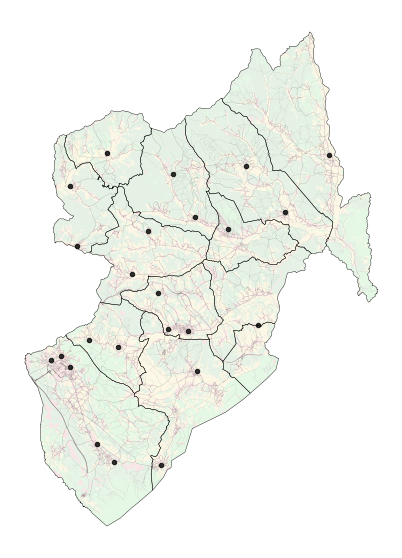

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))

#Plota os limites das freguesias 
gdf_freguesias_CAOP2018[gdf_freguesias_CAOP2018.code_mun==municipio_selecionado].plot(ax=ax,
                        facecolor='None', edgecolor='black', linewidth=0.4, zorder=10)

#Plota ocupação e uso de solo por categoria, em função do esquema de cores definido em colors_cos_hexa
for categoria, data in gpd_COS_municipio.groupby('Megaclasse'):
    # Define the color for each group using the dictionary
    color = colors_cos_hexa[categoria]
    # Plot each group using the color defined above
    data.plot(color=color, ax=ax, alpha=0.1)

#Plota a rede de estradas, em função da linewidths e alphas definido em dict_temp 
for ctype, data in gdf_open_street2019_municipio.groupby('fclass'):
    alpha = dict_temp[ctype][0]
    linewidth = dict_temp[ctype][0]
    data.plot(color = 'black', ax=ax, label=ctype, alpha=alpha, 
              linewidth=linewidth)

#Plota as escolas, precisando-se de definir o ciclo de ensino 
gdf_escolas_Ourem2019_elegiveis[gdf_escolas_Ourem2019_elegiveis['Capacidade_max_1CEB']>0].plot(ax=ax, 
                        color = "black", markersize = 20, alpha = 0.8, label='poly')

ax.set_axis_off()
plt.show()

In [72]:
gdf_escolas_Ourem2019_elegiveis['Capacidade_max_23CEB'] =\
gdf_escolas_Ourem2019_elegiveis['Capacidade_max_2CEB']+gdf_escolas_Ourem2019_elegiveis['Capacidade_max_3CEB']

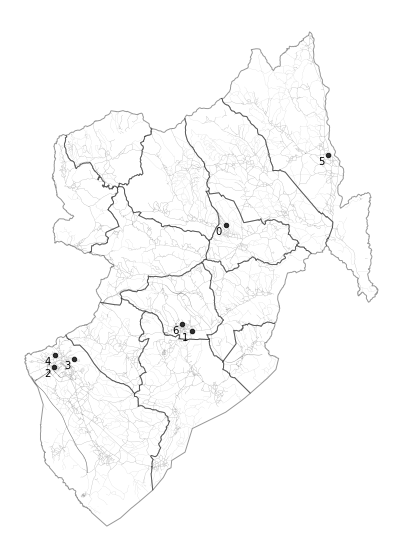

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))
ciclo_ensino = 'Capacidade_max_23CEB'
gdf_escolas =  gdf_escolas_Ourem2019_elegiveis[gdf_escolas_Ourem2019_elegiveis\
            [ciclo_ensino]>0].reset_index()
gdf_escolas.plot(ax=ax, color = "black", markersize = 20, alpha = 0.8, label='poly')
gdf_freguesias_CAOP2018[gdf_freguesias_CAOP2018.code_mun==municipio_selecionado].plot(ax=ax,
                     facecolor='None', edgecolor='black', alpha = 0.4, zorder=20)

for x, y, label in zip (gdf_escolas.geometry.x, gdf_escolas.geometry.y, gdf_escolas.index): 
    ax.annotate (label, xy= (x,y), xytext= (-10,-10), textcoords = "offset points")
    
for ctype, data in gdf_open_street2019_municipio.groupby('fclass'):
    alpha = dict_temp[ctype][0]
    linewidth = dict_temp[ctype][0]
    data.plot(color = 'black', ax=ax, label=ctype, alpha=alpha, 
              linewidth=linewidth, zorder=10)
    
# for x, y, label in zip (gdf_escolas.geometry.x, gdf_escolas.geometry.y, gdf_escolas.Nome_Escola): 
#     ax.annotate (label, xy= (x,y), xytext= (3,3), textcoords = "offset points")

ax.set_axis_off()
plt.savefig('C:/Users/jwolf/Desktop/Mapa_escolas_23CEB.png')

